In [28]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
#load the claims data

data=pd.read_csv(r"C:\Users\Maha\Downloads\weatherAUS.csv\weatherAUS.csv",header=0)
data_bk=data.copy()
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [31]:
data_d=data[data.duplicated(keep='last')]
data_d

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [32]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Axes: >

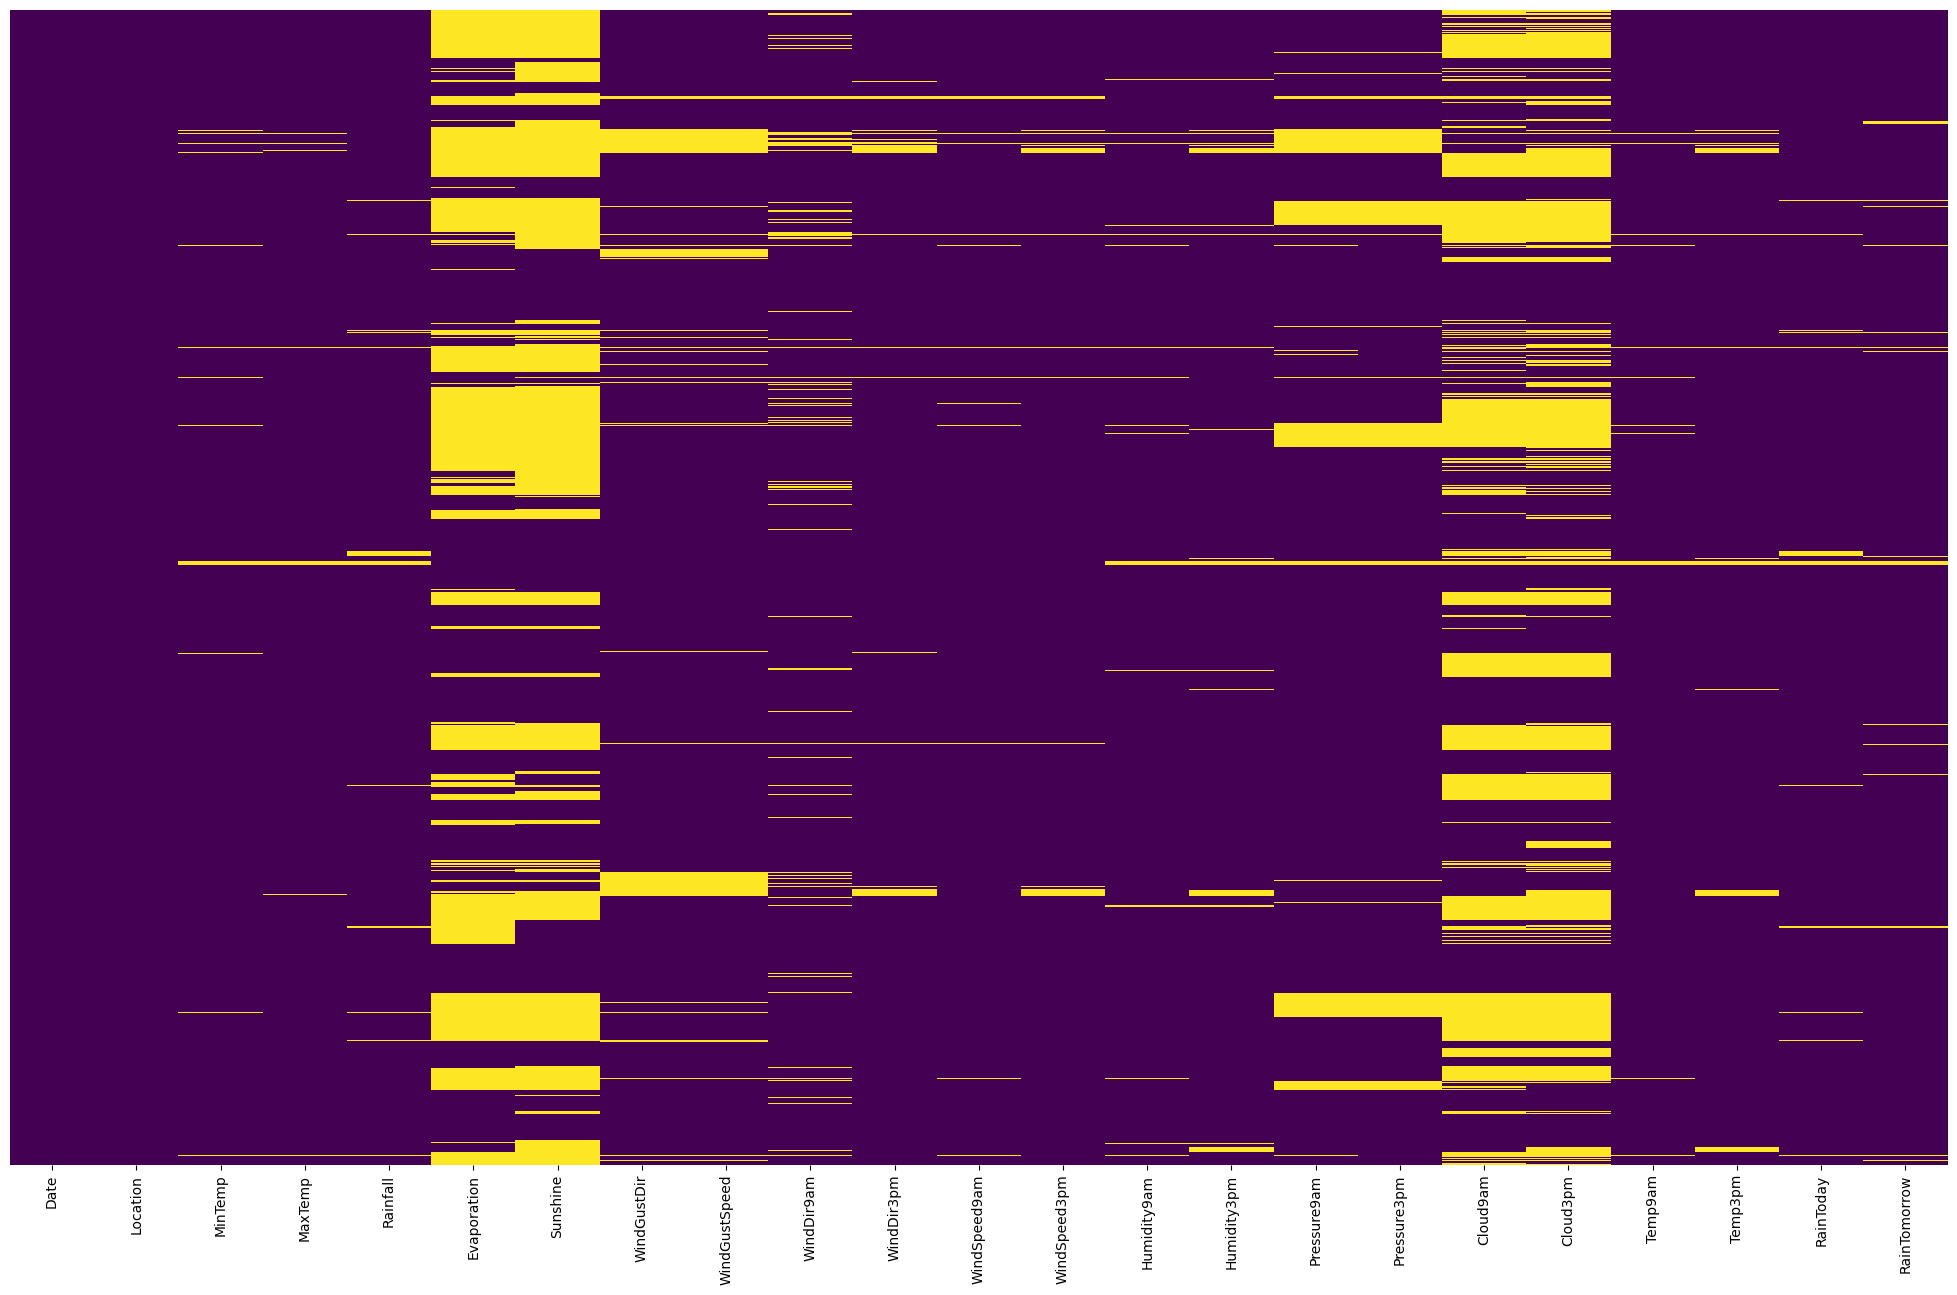

In [33]:
# Visualize missing data in graph
plt.figure(figsize=(25, 15))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
data.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
RainTomorrow     142193
RainToday        142199
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
Location         145460
Date             145460
dtype: int64

In [35]:
data.corr()

C:\Users\Maha\AppData\Local\Temp\ipykernel_12124\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [36]:
#columns that have less than 60% of data
print("Sunshine:",100*(74377/145460))
print("Evaporation:",100*(81350/145460))
print("Cloud3pm:",100*(85099/145460))
print("Cloud9am:",100*(88536/145460))

Sunshine: 51.132270039873504
Evaporation: 55.926027773958474
Cloud3pm: 58.50336862367661
Cloud9am: 60.866217516843115


In [37]:
#delete the columns of less than 60% of data
data = data.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am'],axis=1)

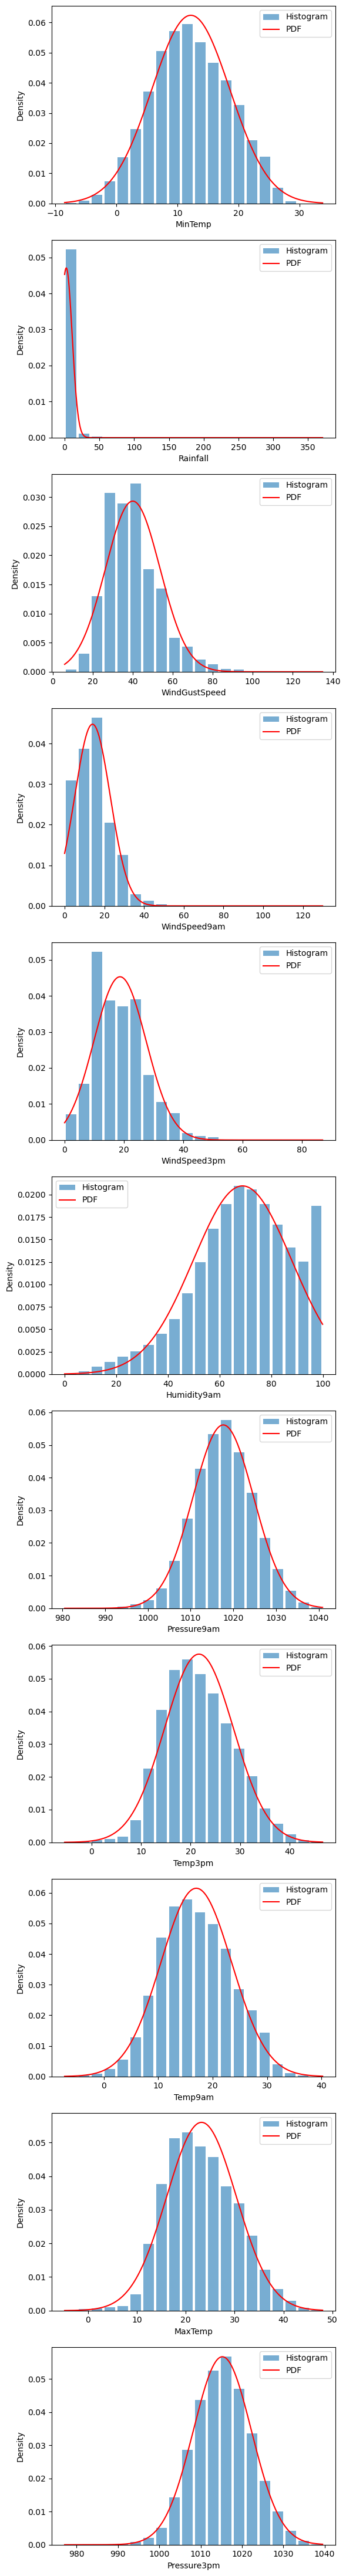

In [38]:
from scipy.stats import norm
import matplotlib.pyplot as plt

variables_to_plot = ['MinTemp',  'Rainfall',  'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Pressure9am', 'Temp3pm','Temp9am','MaxTemp','Pressure3pm']

# Create a new figure
fig, axs = plt.subplots(len(variables_to_plot), 1, figsize=(6, 4 * len(variables_to_plot)))

# Iterate through the list of variables
for i, variable in enumerate(variables_to_plot):
    # Plot histogram with bars
    axs[i].hist(data[variable], bins=20, rwidth=0.8, density=True, alpha=0.6, label='Histogram')

    # Plot PDF of normal distribution
    rng = np.arange(data[variable].min(), data[variable].max(), 0.1)
    axs[i].plot(rng, norm.pdf(rng, data[variable].mean(), data[variable].std()), 'r-', label='PDF')

    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Density')
    axs[i].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [40]:
cols_normal=[ 'MinTemp','MaxTemp','Temp3pm','Temp9am']
for i in cols_normal:
  data[i]=data[i].fillna(data[i].mean())

In [41]:
cols_not_normal=['Rainfall', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am','Pressure3pm']
for i in cols_not_normal:
  data[i]=data[i].fillna(data[i].median())

In [42]:
data.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [44]:
cols_cat=['WindGustDir', 'WindDir9am','WindDir3pm', 'RainToday','RainTomorrow']
for i in cols_cat:
  data[i]=data[i].fillna(data[i].mode()[0])

In [45]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [46]:
data_d=data[data.duplicated(keep='last')]
data_d

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [47]:
data.shape

(145460, 19)

In [48]:
data['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
#count the target or dependent variable by 0 & 1 and their proportion
#(>=10:1,then the datset is imbalance data)
Class_count=data.RainTomorrow.value_counts()
print("class 0:",Class_count[0])
print("class 1:",Class_count[1])
print("Proportion:",round(Class_count[0]/Class_count[1],2),':1')
print("Total Bank records:",len(data))

class 0: 113583
class 1: 31877
Proportion: 3.56 :1
Total Bank records: 145460


In [50]:
data['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

In [51]:
data['RainToday'].value_counts()

No     113580
Yes     31880
Name: RainToday, dtype: int64

In [52]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [53]:

# Use LabelBinarizer for target variables
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
data['RainTomorrow'] = LB.fit_transform(data['RainTomorrow'])
data['RainToday'] = LB.fit_transform(data['RainToday'])


In [54]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [55]:
data['Date'].value_counts()

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

In [56]:
data['month'] = pd.DatetimeIndex(data['Date']).month
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12


In [57]:
data['month'].value_counts()

3     13361
5     13353
1     13236
6     12684
8     12028
10    12028
7     12025
11    11669
9     11640
4     11550
12    11093
2     10793
Name: month, dtype: int64

In [58]:
import pandas as pd

# Define a function to map values to categories
def categorize_values(value):
    if value ==1 or value==2:
        return 'Winter'
    elif value==3:
        return 'Spring'
    elif value ==4 or value==5:
        return 'Summer'
    elif value ==6 or value==7 or value ==8 or value==9:
        return 'Monsoon'
    elif value ==10 or value==11:
        return 'Autumn'
    elif value==12:
        return 'Pre-winter'

# Apply the categorize_values function to create a new column
data['Season'] = data['month'].apply(categorize_values)




In [59]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,Season
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,Pre-winter
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12,Pre-winter
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12,Pre-winter
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12,Pre-winter
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12,Pre-winter
5,2008-12-06,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,...,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0,12,Pre-winter
6,2008-12-07,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,...,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0,12,Pre-winter
7,2008-12-08,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,...,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0,12,Pre-winter
8,2008-12-09,Albury,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,...,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1,12,Pre-winter
9,2008-12-10,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,...,58.0,27.0,1007.0,1005.7,20.1,28.2,1,0,12,Pre-winter


C:\Users\Maha\AppData\Local\Temp\ipykernel_12124\267591316.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


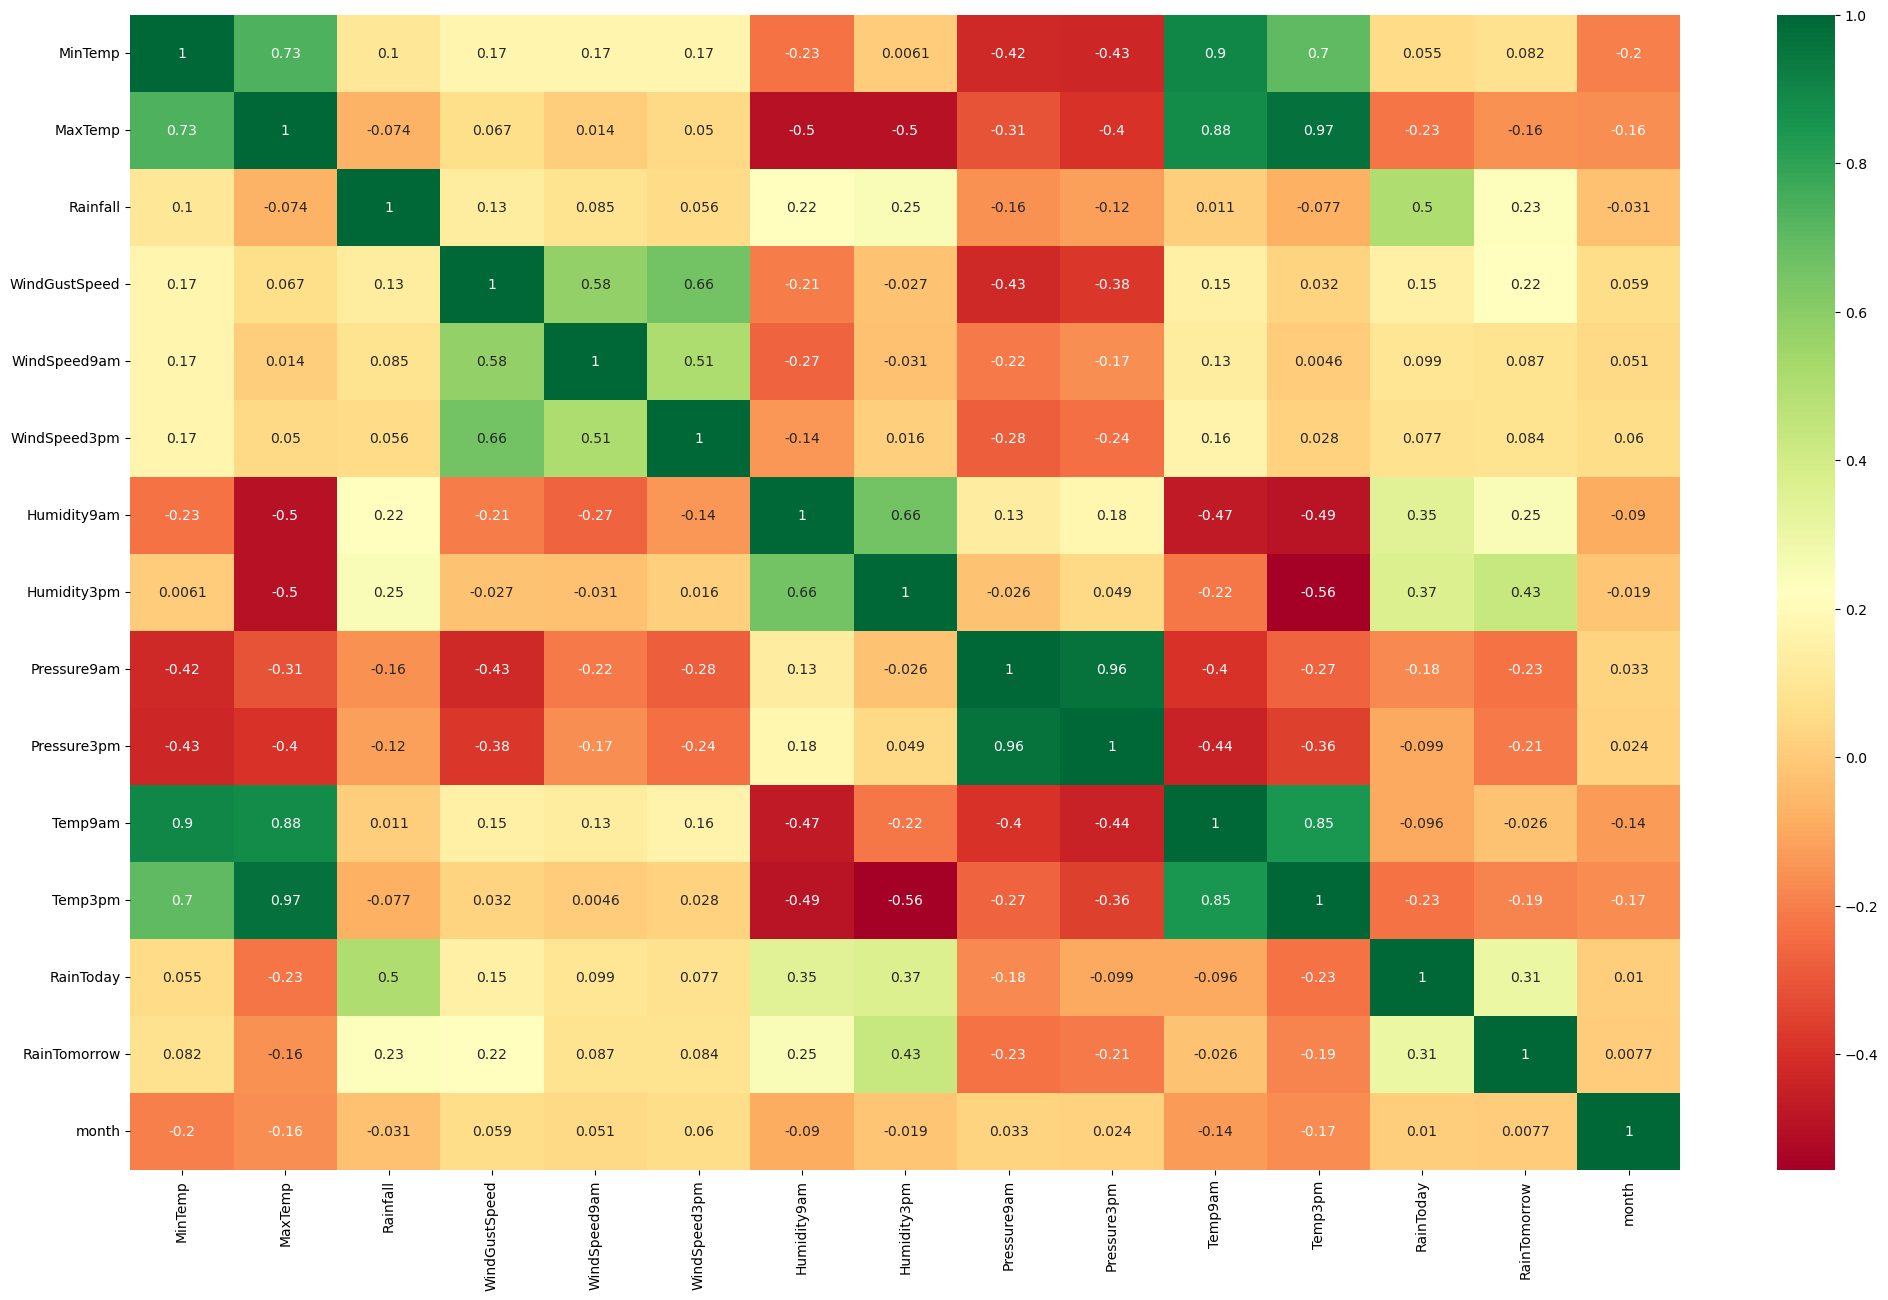

In [60]:
corr = data.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

In [61]:
#delete the columns which are correlated with each other and the one which is less correlated with target variable
data = data.drop(columns=['Temp9am','MaxTemp','Pressure3pm'],axis=1)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  object 
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  object 
 7   WindDir3pm     145460 non-null  object 
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Temp3pm        145460 non-null  float64
 14  RainToday      145460 non-null  int32  
 15  RainTomorrow   145460 non-null  int32  
 16  month          145460 non-null  int64  
 17  Season         145460 non-nul

In [64]:
del data['Date']

In [66]:
import pandas as pd

# Assuming df is your DataFrame
contingency_table = pd.crosstab(data['Season'], data['RainTomorrow'])
print(contingency_table)


RainTomorrow      0      1
Season                    
Autumn        18951   4746
Monsoon       36386  11991
Pre-winter     8843   2250
Spring        10580   2781
Summer        19499   5404
Winter        19324   4705


In [67]:
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 386.35785377302847
P-value: 2.583029049263095e-81


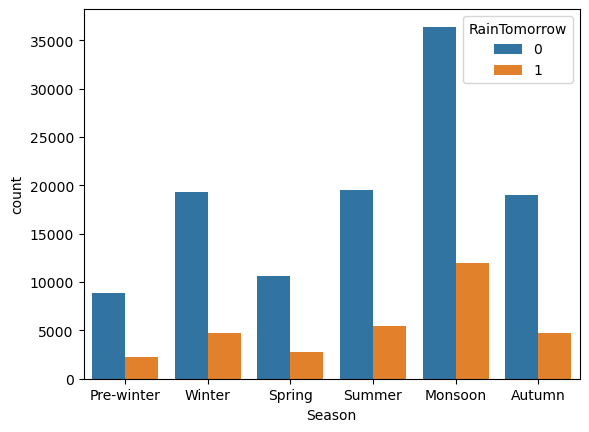

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.countplot(x='Season', hue='RainTomorrow', data=data)
plt.show()

In [69]:
del data['month']


In [70]:
data.shape

(145460, 16)

In [71]:
data['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [72]:

#chances of not raining
100*(110316/142193)


77.58187815152645

In [73]:

#chances of  raining
100*(31877/142193)
data['WindGustDir'].value_counts()

W      20241
SE      9418
N       9313
SSE     9216
E       9181
S       9168
WSW     9069
SW      8967
SSW     8736
WNW     8252
NW      8122
ENE     8104
ESE     7372
NE      7133
NNW     6620
NNE     6548
Name: WindGustDir, dtype: int64

In [74]:
# Identify the numerical and categorical variables

num_vars = data.columns[data.dtypes != 'object']
cat_vars = data.columns[data.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['MinTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Season'], dtype='object')


In [75]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
data.columns

Index(['Location', 'MinTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'Season'],
      dtype='object')

In [77]:
from category_encoders.target_encoder import TargetEncoder

# set up the encoder
encoder = TargetEncoder(cols=['Location','WindGustDir', 'WindDir9am', 'WindDir3pm'])

# fit the encoder - finds the mean target value per category
encoder.fit(data, data['RainTomorrow'])

# transform data
data = encoder.transform(data)

In [78]:
data.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Temp3pm,RainToday,RainTomorrow,Season
0,0.203289,13.4,0.6,0.250679,44.0,0.254995,0.270453,20.0,24.0,71.0,22.0,1007.7,21.8,0,0,Pre-winter
1,0.203289,7.4,0.0,0.275691,44.0,0.304511,0.219899,4.0,22.0,44.0,25.0,1010.6,24.3,0,0,Pre-winter
2,0.203289,12.9,0.0,0.229904,46.0,0.254995,0.219899,19.0,26.0,38.0,30.0,1007.6,23.2,0,0,Pre-winter
3,0.203289,9.2,0.0,0.184915,24.0,0.160547,0.168673,11.0,9.0,45.0,16.0,1017.6,26.5,0,0,Pre-winter
4,0.203289,17.5,1.0,0.250679,41.0,0.174196,0.277933,7.0,20.0,82.0,33.0,1010.8,29.7,0,0,Pre-winter


In [79]:
data.columns


Index(['Location', 'MinTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'Season'],
      dtype='object')

In [80]:
data.describe()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,0.219146,12.194034,2.307990,0.219146,39.962189,0.219146,0.219146,14.030751,18.669758,68.901251,51.553396,1017.644768,21.683390,0.219167,0.219146
std,0.063915,6.365750,8.389771,0.041791,13.120931,0.045862,0.037670,8.861796,8.716716,18.855360,20.471345,6.728484,6.850057,0.413683,0.413669
min,0.067132,-8.500000,0.000000,0.147043,6.000000,0.143309,0.167078,0.000000,0.000000,0.000000,0.000000,980.500000,-5.400000,0.000000,0.000000
25%,0.184868,7.700000,0.000000,0.184915,31.000000,0.175702,0.186494,7.000000,13.000000,57.000000,37.000000,1013.500000,16.700000,0.000000,0.000000
50%,0.217016,12.100000,0.000000,0.220004,39.000000,0.226641,0.209047,13.000000,19.000000,70.000000,52.000000,1017.600000,21.400000,0.000000,0.000000
75%,0.266834,16.800000,0.600000,0.250679,46.000000,0.254995,0.250049,19.000000,24.000000,83.000000,65.000000,1021.800000,26.200000,0.000000,0.000000
max,0.363908,33.900000,371.000000,0.281420,135.000000,0.304511,0.277933,130.000000,87.000000,100.000000,100.000000,1041.000000,46.700000,1.000000,1.000000


In [81]:
data.columns

Index(['Location', 'MinTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'Season'],
      dtype='object')

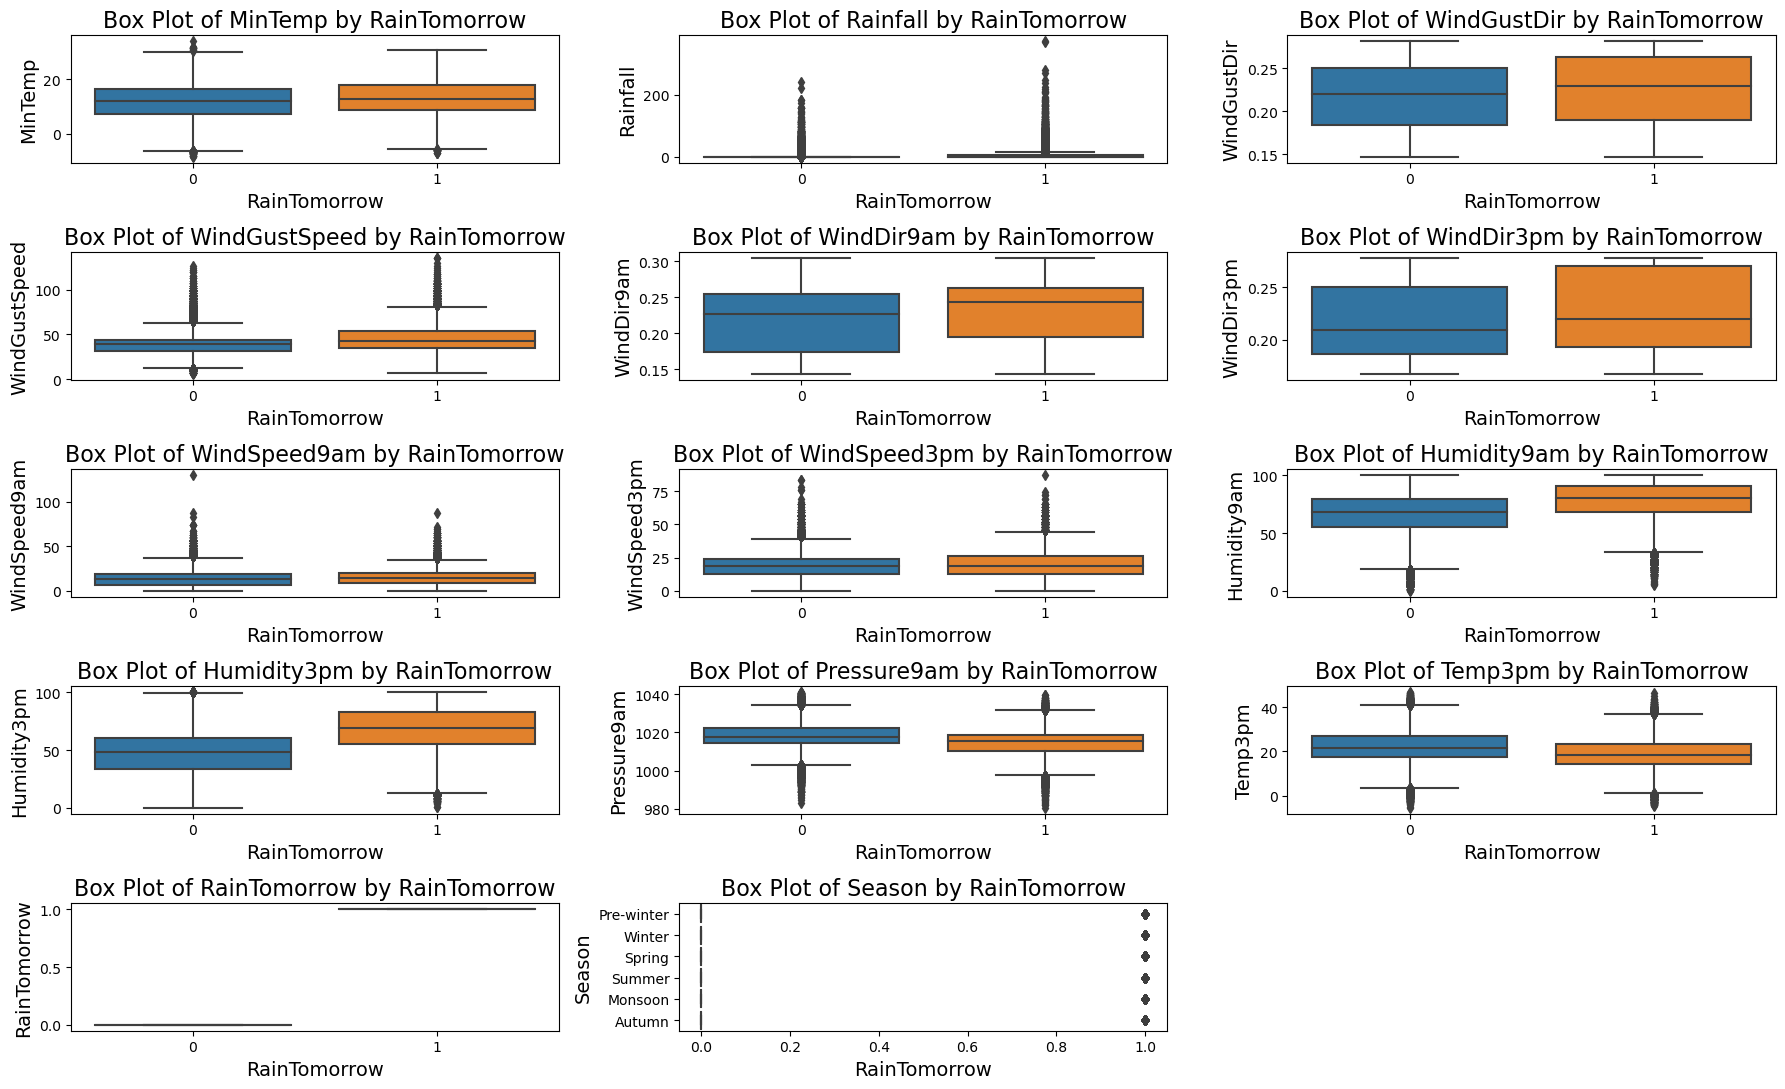

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'sdata'
plt.figure(figsize=(18, 11))

numerical_columns = ['MinTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
                     'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                     'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainTomorrow', 'Season']

num_plots = len(numerical_columns)
num_rows = (num_plots + 2) // 3  # Calculate number of rows dynamically
num_cols = min(num_plots, 3)  # Maximum of 3 columns

for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='RainTomorrow', y=col, data=data)
    plt.title(f'Box Plot of {col} by RainTomorrow',fontsize=16)
    plt.xlabel('RainTomorrow',fontsize=14)
    plt.ylabel(col,fontsize=14)

plt.tight_layout()
plt.show()


In [62]:
print(data['Rainfall'].max())
print(data['Rainfall'].min())
print(data['Rainfall'].value_counts())

371.0
0.0
0.0      94341
0.2       8761
0.4       3782
0.6       2592
0.8       2056
         ...  
134.8        1
84.4         1
157.6        1
166.8        1
69.0         1
Name: Rainfall, Length: 681, dtype: int64


In [63]:
data.shape

(145460, 16)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  float64
 1   MinTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   WindGustDir    145460 non-null  float64
 4   WindGustSpeed  145460 non-null  float64
 5   WindDir9am     145460 non-null  float64
 6   WindDir3pm     145460 non-null  float64
 7   WindSpeed9am   145460 non-null  float64
 8   WindSpeed3pm   145460 non-null  float64
 9   Humidity9am    145460 non-null  float64
 10  Humidity3pm    145460 non-null  float64
 11  Pressure9am    145460 non-null  float64
 12  Temp3pm        145460 non-null  float64
 13  RainToday      145460 non-null  int32  
 14  RainTomorrow   145460 non-null  int32  
 15  Season         145460 non-null  object 
dtypes: float64(13), int32(2), object(1)
memory usage: 16.6+ MB


In [65]:
data['Season'].value_counts()

Monsoon       48377
Summer        24903
Winter        24029
Autumn        23697
Spring        13361
Pre-winter    11093
Name: Season, dtype: int64

In [84]:
#label encoder is used for ordinal categorical variable
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

data['Season'] = label_encoder.fit_transform(data['Season'])

# Display the DataFrame with the encoded attribute
data.head(10)

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Temp3pm,RainToday,RainTomorrow,Season
0,0.203289,13.4,0.6,0.250679,44.0,0.254995,0.270453,20.0,24.0,71.0,22.0,1007.7,21.8,0,0,2
1,0.203289,7.4,0.0,0.275691,44.0,0.304511,0.219899,4.0,22.0,44.0,25.0,1010.6,24.3,0,0,2
2,0.203289,12.9,0.0,0.229904,46.0,0.254995,0.219899,19.0,26.0,38.0,30.0,1007.6,23.2,0,0,2
3,0.203289,9.2,0.0,0.184915,24.0,0.160547,0.168673,11.0,9.0,45.0,16.0,1017.6,26.5,0,0,2
4,0.203289,17.5,1.0,0.250679,41.0,0.174196,0.277933,7.0,20.0,82.0,33.0,1010.8,29.7,0,0,2
5,0.203289,14.6,0.2,0.275691,56.0,0.254995,0.250049,19.0,24.0,55.0,23.0,1009.2,28.9,0,0,2
6,0.203289,14.3,0.0,0.250679,50.0,0.226641,0.250049,20.0,24.0,49.0,19.0,1009.6,24.6,0,0,2
7,0.203289,7.7,0.0,0.250679,35.0,0.175702,0.250049,6.0,17.0,48.0,19.0,1013.4,25.5,0,0,2
8,0.203289,9.7,0.0,0.281420,80.0,0.160547,0.277933,7.0,28.0,42.0,9.0,1008.9,30.2,0,1,2
9,0.203289,13.1,1.4,0.250679,28.0,0.194133,0.186190,15.0,11.0,58.0,27.0,1007.0,28.2,1,0,2


In [67]:
data.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Temp3pm,RainToday,RainTomorrow,Season
0,0.203289,13.4,0.6,0.250679,44.0,0.254995,0.270453,20.0,24.0,71.0,22.0,1007.7,21.8,0,0,2
1,0.203289,7.4,0.0,0.275691,44.0,0.304511,0.219899,4.0,22.0,44.0,25.0,1010.6,24.3,0,0,2
2,0.203289,12.9,0.0,0.229904,46.0,0.254995,0.219899,19.0,26.0,38.0,30.0,1007.6,23.2,0,0,2
3,0.203289,9.2,0.0,0.184915,24.0,0.160547,0.168673,11.0,9.0,45.0,16.0,1017.6,26.5,0,0,2
4,0.203289,17.5,1.0,0.250679,41.0,0.174196,0.277933,7.0,20.0,82.0,33.0,1010.8,29.7,0,0,2


In [68]:
data.columns

Index(['Location', 'MinTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainToday',
       'RainTomorrow', 'Season'],
      dtype='object')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  float64
 1   MinTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   WindGustDir    145460 non-null  float64
 4   WindGustSpeed  145460 non-null  float64
 5   WindDir9am     145460 non-null  float64
 6   WindDir3pm     145460 non-null  float64
 7   WindSpeed9am   145460 non-null  float64
 8   WindSpeed3pm   145460 non-null  float64
 9   Humidity9am    145460 non-null  float64
 10  Humidity3pm    145460 non-null  float64
 11  Pressure9am    145460 non-null  float64
 12  Temp3pm        145460 non-null  float64
 13  RainToday      145460 non-null  int32  
 14  RainTomorrow   145460 non-null  int32  
 15  Season         145460 non-null  int32  
dtypes: float64(13), int32(3)
memory usage: 16.1 MB


In [85]:
numerical_attributes = ['MinTemp', 'Rainfall','WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainToday',
        'Season']

#for normal distribution
import pandas as pd
from scipy import stats

# Define the numerical columns for outlier detection which are normally distributed

# Calculate Z-Scores for each numerical variable
z_scores = pd.DataFrame()
for col in numerical_attributes:
    z_scores[col] = stats.zscore(data[col])

# Define the Z-Score threshold for outlier detection
z_score_threshold = 3

# Find and remove rows with outliers based on the threshold
data_no_outliers =data[(z_scores.abs() <= z_score_threshold).all(axis=1)]

# Display the cleaned dataset without outliers
print("Cleaned dataset without outliers:")
print(data_no_outliers.head())

Cleaned dataset without outliers:
   Location  MinTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0  0.203289     13.4       0.6     0.250679           44.0    0.254995   
1  0.203289      7.4       0.0     0.275691           44.0    0.304511   
2  0.203289     12.9       0.0     0.229904           46.0    0.254995   
3  0.203289      9.2       0.0     0.184915           24.0    0.160547   
4  0.203289     17.5       1.0     0.250679           41.0    0.174196   

   WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0    0.270453          20.0          24.0         71.0         22.0   
1    0.219899           4.0          22.0         44.0         25.0   
2    0.219899          19.0          26.0         38.0         30.0   
3    0.168673          11.0           9.0         45.0         16.0   
4    0.277933           7.0          20.0         82.0         33.0   

   Pressure9am  Temp3pm  RainToday  RainTomorrow  Season  
0       1007.7     21.8          0 

In [71]:
data_no_outliers.shape

(138472, 16)

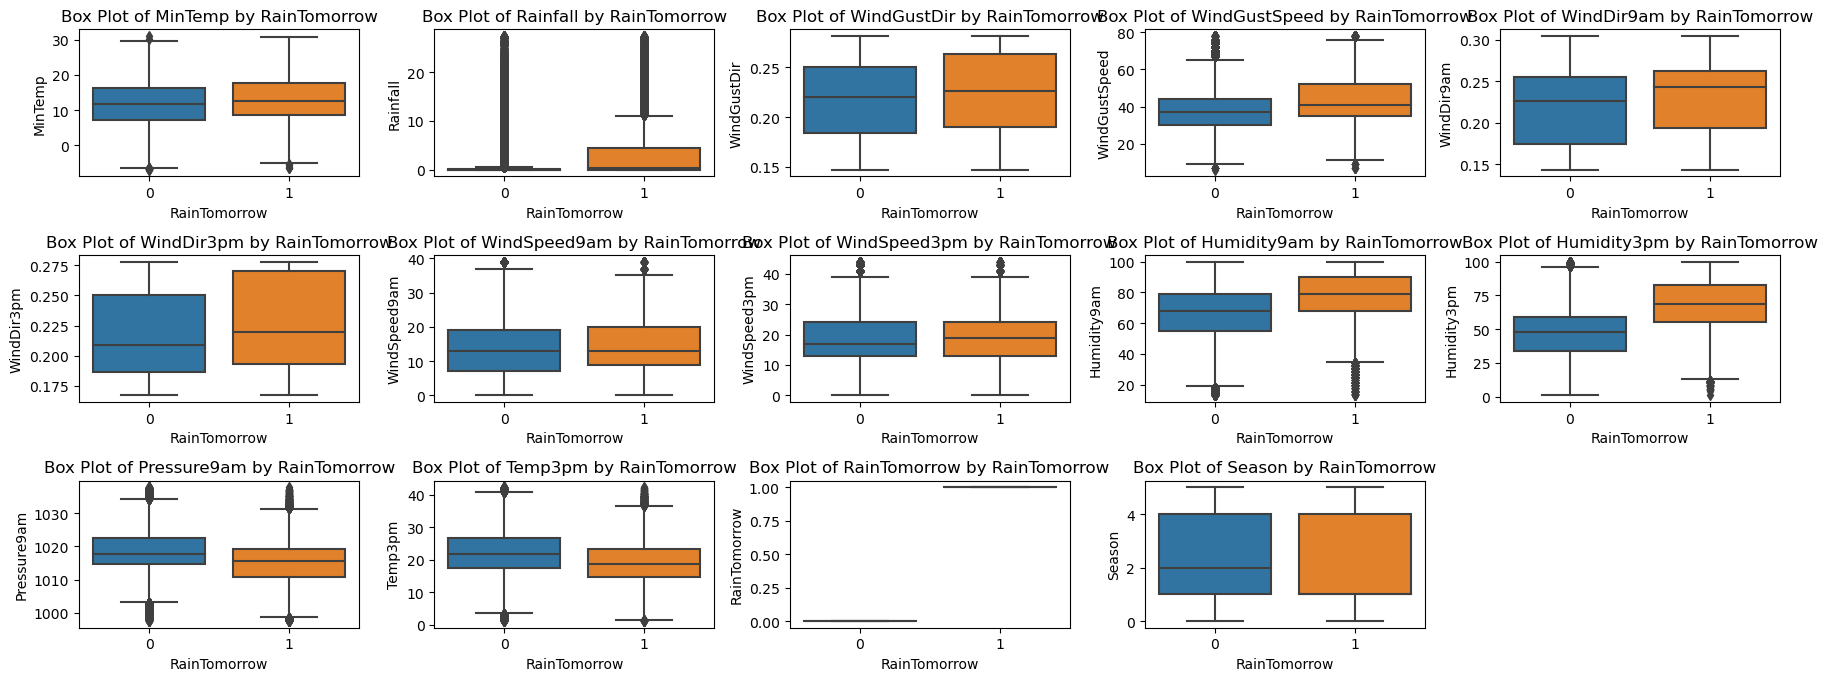

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'sdata'
plt.figure(figsize=(18, 11))
numerical_attributes = ['MinTemp', 'Rainfall','WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainToday',
        'Season']
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(x='RainTomorrow', y=col, data=data_no_outliers)
    plt.title(f'Box Plot of {col} by RainTomorrow')
    plt.xlabel('RainTomorrow')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [73]:
data_no_outliers.head(5)

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Temp3pm,RainToday,RainTomorrow,Season
0,0.203289,13.4,0.6,0.250679,44.0,0.254995,0.270453,20.0,24.0,71.0,22.0,1007.7,21.8,0,0,2
1,0.203289,7.4,0.0,0.275691,44.0,0.304511,0.219899,4.0,22.0,44.0,25.0,1010.6,24.3,0,0,2
2,0.203289,12.9,0.0,0.229904,46.0,0.254995,0.219899,19.0,26.0,38.0,30.0,1007.6,23.2,0,0,2
3,0.203289,9.2,0.0,0.184915,24.0,0.160547,0.168673,11.0,9.0,45.0,16.0,1017.6,26.5,0,0,2
4,0.203289,17.5,1.0,0.250679,41.0,0.174196,0.277933,7.0,20.0,82.0,33.0,1010.8,29.7,0,0,2


In [74]:
cols=[ 'Location','MinTemp',  'Rainfall','WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',   'Temp3pm','Season']
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0, 1))
data_no_outliers[cols]=mmscaler.fit_transform(data_no_outliers[cols])
data_no_outliers=pd.DataFrame(data_no_outliers)



C:\Users\Maha\AppData\Local\Temp\ipykernel_24164\1123956124.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers[cols]=mmscaler.fit_transform(data_no_outliers[cols])


In [75]:
data_no_outliers.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Temp3pm,RainToday,RainTomorrow,Season
0,0.458788,0.535620,0.021898,0.771236,0.527778,0.692830,0.932527,0.512821,0.545455,0.666667,0.212121,0.253102,0.502439,0,0,0.4
1,0.458788,0.377309,0.000000,0.957365,0.527778,1.000000,0.476489,0.102564,0.500000,0.356322,0.242424,0.325062,0.563415,0,0,0.4
2,0.458788,0.522427,0.000000,0.616632,0.555556,0.692830,0.476489,0.487179,0.590909,0.287356,0.292929,0.250620,0.536585,0,0,0.4
3,0.458788,0.424802,0.000000,0.281836,0.250000,0.106936,0.014389,0.282051,0.204545,0.367816,0.151515,0.498759,0.617073,0,0,0.4
4,0.458788,0.643799,0.036496,0.771236,0.486111,0.191606,1.000000,0.179487,0.454545,0.793103,0.323232,0.330025,0.695122,0,0,0.4


In [76]:
data_no_outliers.reset_index(drop=True, inplace=True)
data_no_outliers.to_csv('final_weather_data.csv', index=False)